In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson

In [2]:
def metoda_2(m_t, inv_m_t, T):
    t = 0
    I = 0
    M = m_t(T)
    N = poisson.rvs(M)
    S = np.zeros(N)
    while I < N:
        U = np.random.uniform(0, 1)
        S[I] = inv_m_t(U, M)
        I += 1
    S.sort()
    return S

In [3]:
def m_t(t):
    return np.log(t + 1)


def inv_m_t(t, m):
    return np.exp(m * t) - 1


def integral(t):
    return np.log(t + 1)

In [4]:
N = np.zeros(100)
for i in range(100):
    S = metoda_2(m_t, inv_m_t, 100)
    N[i] = len(S)

/home/aga/miniconda3/envs/symulacje/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


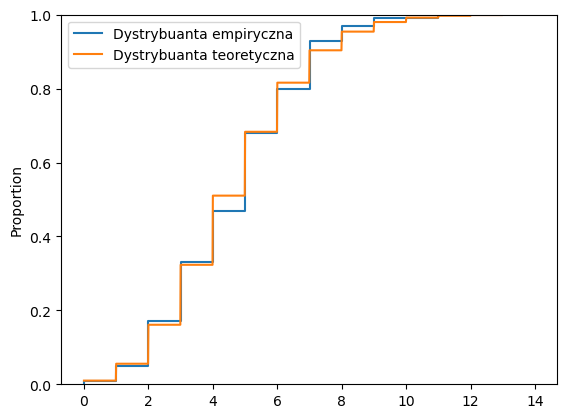

In [5]:
t = np.arange(0, 14, 0.01)

sns.ecdfplot(N, label="Dystrybuanta empiryczna")
plt.plot(t, poisson.cdf(t, integral(100)), label="Dystrybuanta teoretyczna")
plt.legend()